# CS 12: TensorFlow Lecture 1 Live Coding
This notebook outlines a simple quadratic regression of the function $y=2x^2+3x-2$ in TensorFlow.

In [ ]:
# Necessary imports
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

## Problem Set Up
We will create 50 datapoints on the domain $x\in[0,5]$. The target data to regress for each point will be,

$$y_i=2x_i^2+3x_i-2+\varepsilon_i$$

We will be using the mean-squared error loss (MSE), $\mathcal{L}=\frac{1}{n}\sum_{i=1}^n(y_i-f(x_i))^2$ where $f(x_i)$ is our model's prediction, for the gradient descent algorithm. This is least-squares regression so it is equivalent to maximum likelihood estimation where the assumption is that our residuals (difference between targets and predictions) are normally distributed, so we will add Gaussian noise, $\varepsilon_i\sim\mathcal{N}(0,25)$, to each of our targets to make this problem nontrivial.

In [ ]:
# Equally spaced points in interval [0, 5]
x_t = np.linspace(0, 5, 50)
func = 2 * x_t ** 2 + 3 * x_t - 2
# Noise is sampled from Gaussian with mean of 0 and std. dev. of 5
y_t = func + np.random.normal(0, 5, 50)

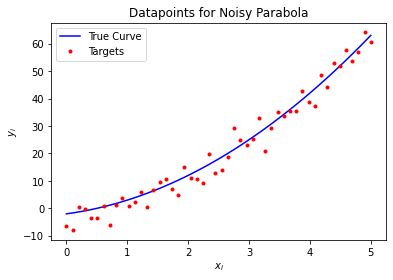

In [ ]:
# Plot our data
plt.plot(x_t, func, 'b-', label='True Curve')
plt.plot(x_t, y_t, 'r.', label='Targets')
plt.xlabel(r'$x_i$')
plt.ylabel(r'$y_i$')
plt.title('Datapoints for Noisy Parabola')
plt.legend()
plt.show()

## Creating and Training a Model
We must write a model to perform our regression. We will create parameters (weights) $w_i$ and learn them through gradient descent. Our model is,

$$f(x_i)=w_0+w_1x_i+w_2x_i^2$$

In [ ]:
# Create TensorFlow `tf.Variable`s for our model and randomly initialize them
w0 = tf.Variable(np.random.randn(), name='w0')
w1 = tf.Variable(np.random.randn(), name='w1')
w2 = tf.Variable(np.random.randn(), name='w2')

In [ ]:
# We will use stochastic gradient descent with a learning rate of 0.001
optimizer = tf.optimizers.SGD(1e-3)

In [ ]:
# Train for 200 epochs
for _ in range(200):
    # Loop through training set
    for x, y in zip(x_t, y_t):
        # Use `tf.GradientTape` to watch variables for automatic differentiation
        with tf.GradientTape() as g:
            # Model prediction: f(x_i)
            pred = w0 + w1 * x + w2 * x ** 2
            # Mean-squared error between target and prediction
            cost = tf.reduce_mean((pred - y) ** 2)
        # Variables to differentiate with respect to
        args = [w0, w1, w2]
        # Compute gradients
        grads = g.gradient(cost, args)
        # Do one iteration of gradient descent
        optimizer.apply_gradients(zip(grads, args))

## Model Evaluation

In [ ]:
# Check regressed parameters
tf.print('w0:\t', w0, '\nw1:\t', w1, '\nw2:\t', w2)

w0:	 -3.54321027 
w1:	 4.00006723 
w2:	 1.67792058


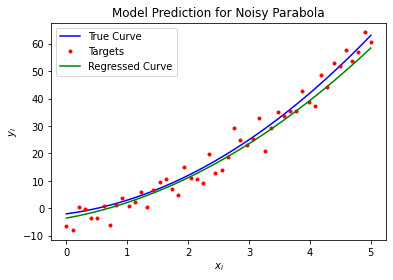

In [ ]:
# Plot our model's predictions
plt.plot(x_t, func, 'b-', label='True Curve')
plt.plot(x_t, y_t, 'r.', label='Targets')
plt.plot(x_t, w0 + w1 * x_t + w2 * x_t ** 2, 'g-', label='Regressed Curve')
plt.xlabel(r'$x_i$')
plt.ylabel(r'$y_i$')
plt.title('Model Prediction for Noisy Parabola')
plt.legend()
plt.show()

In [ ]:
# Print MSE of our predictions
print('MSE:\t', np.mean(((w0 + w1 * x_t + w2 * x_t ** 2) - y_t) ** 2), sep='')

MSE:	14.845846
